## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [04] : [Induksi Pohon Kepututsan] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [141]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Reinhard Javera Maheswara"
myNIM = "77732"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Reinhard Javera Maheswara
NIM: 		77732
Start: 		2024-09-26 21:25:55.000358
Device ID: 	3d832980-7c13-11ef-b51a-9d731ecb2914



---

### Dataset yang dipakai:

1. [Pokemon] – sumber : [https://www.kaggle.com/datasets/shreyasur965/pokemon-go]

### Hasil kerja

In [142]:
!pip install mglearn

In [143]:
!pip install graphviz

In [144]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz-12.1.1-win32/bin'


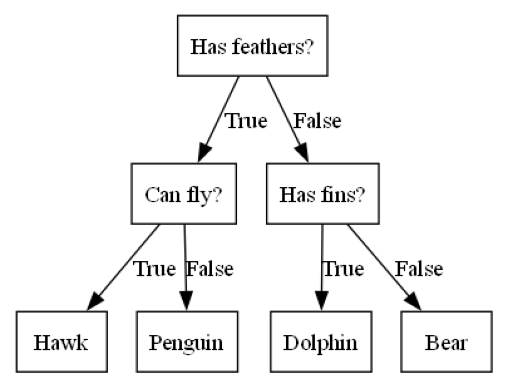

In [145]:
mglearn.plots.plot_animal_tree()

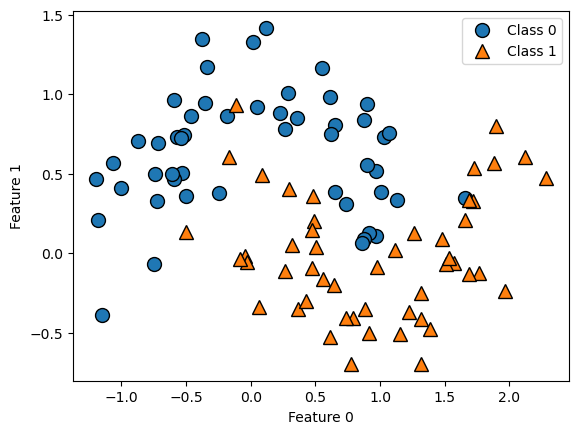

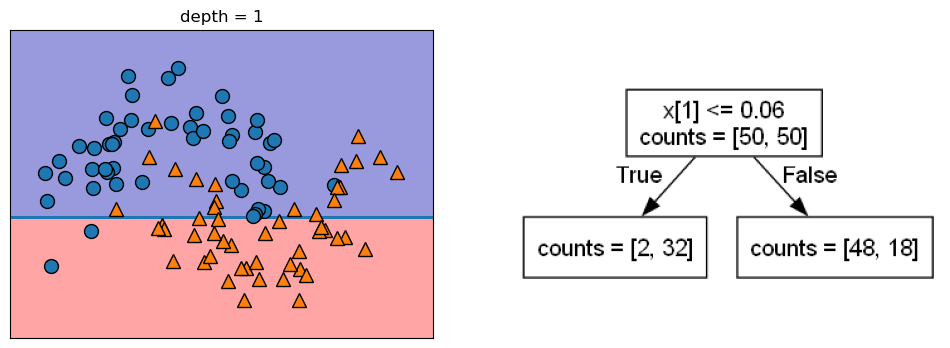

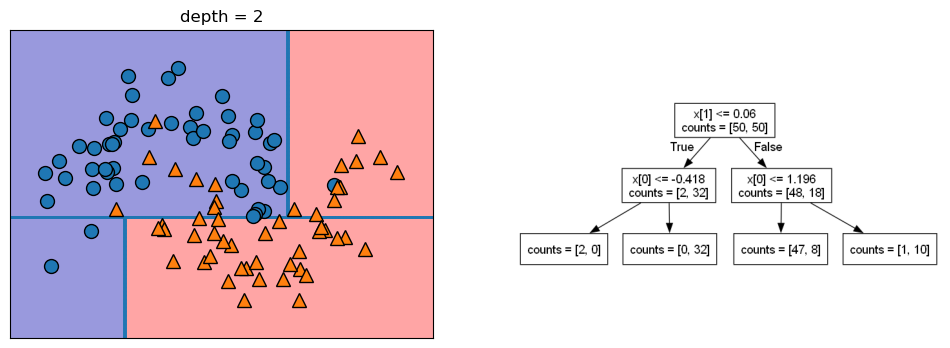

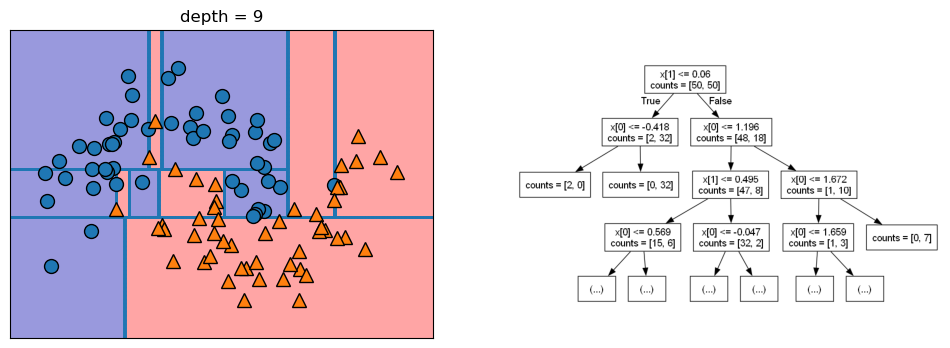

In [146]:
mglearn.plots.plot_tree_progressive()

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [148]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [149]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

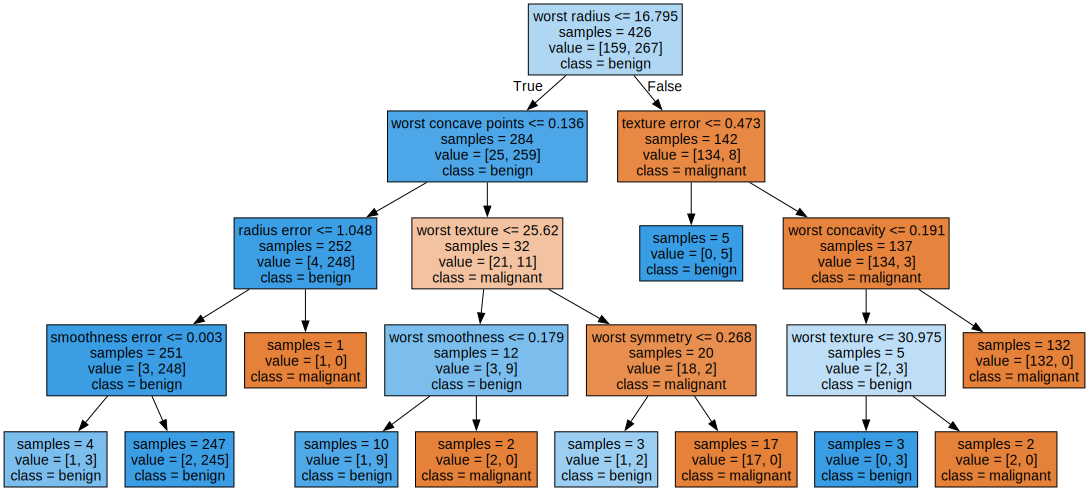

In [150]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [151]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


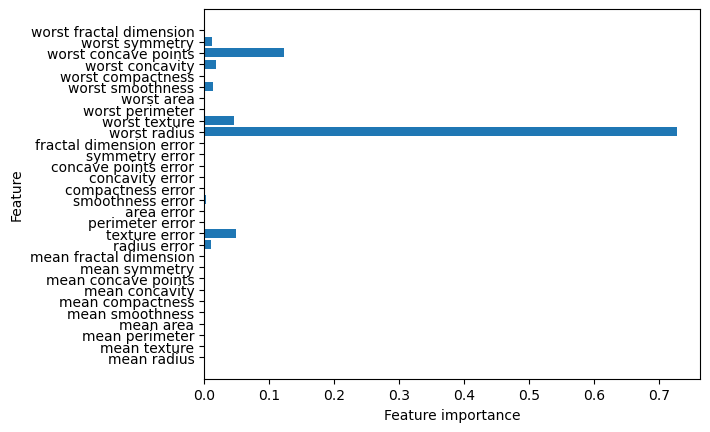

In [152]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


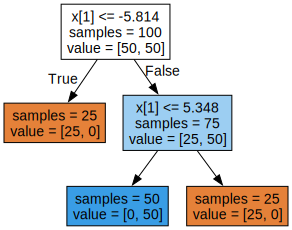

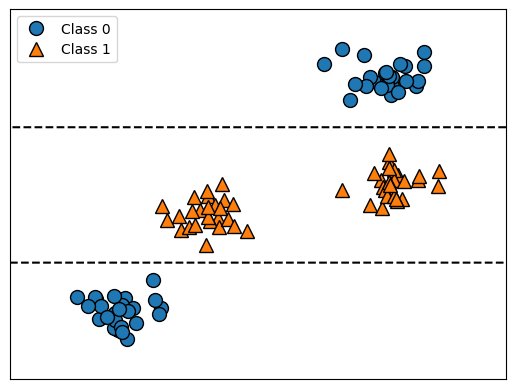

In [153]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

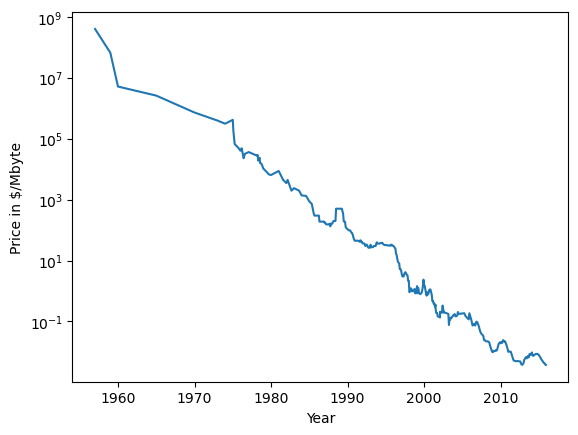

In [154]:
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [155]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]


# Convert to NumPy array before indexing
x_train = data_train.date.values[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

# Predict on all data, converting the series to a NumPy array
x_all = ram_prices.date.values[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

# Undo the log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

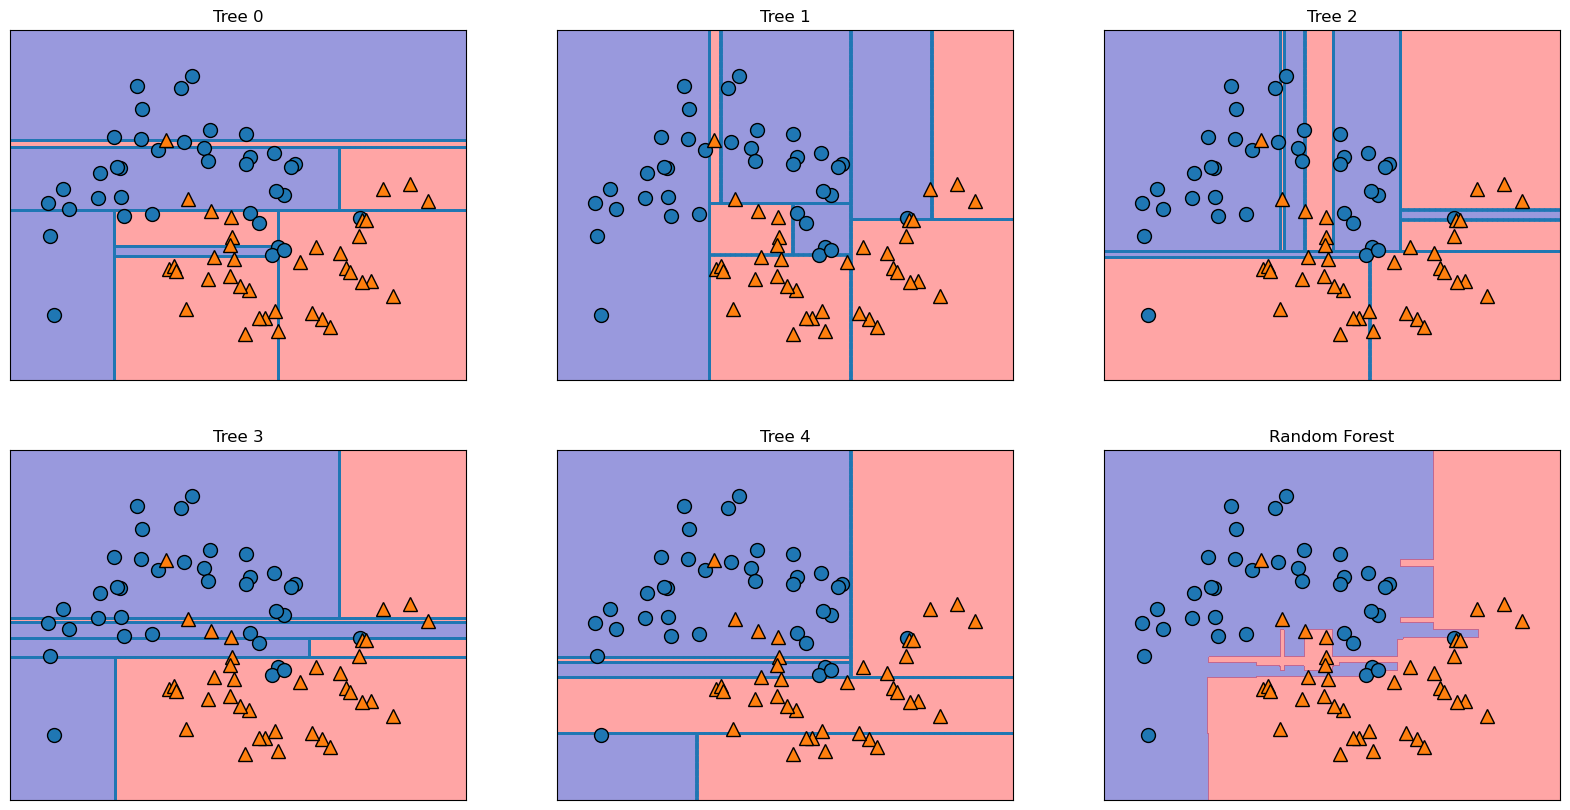

In [157]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [159]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [161]:
from collections import Counter
import math

def calculate_entropy(data):
    total_elements = len(data)
    class_counts = Counter(data)
    entropy = 0.0

    for count in class_counts.values():
        probability = count / total_elements
        entropy -= probability * math.log2(probability)

    return entropy

target_entropy = calculate_entropy(df['target'])
print(f'Entropy dari target (kelas): {target_entropy}')

Entropy dari target (kelas): 1.584962500721156


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy}')

Akurasi model Decision Tree: 1.0


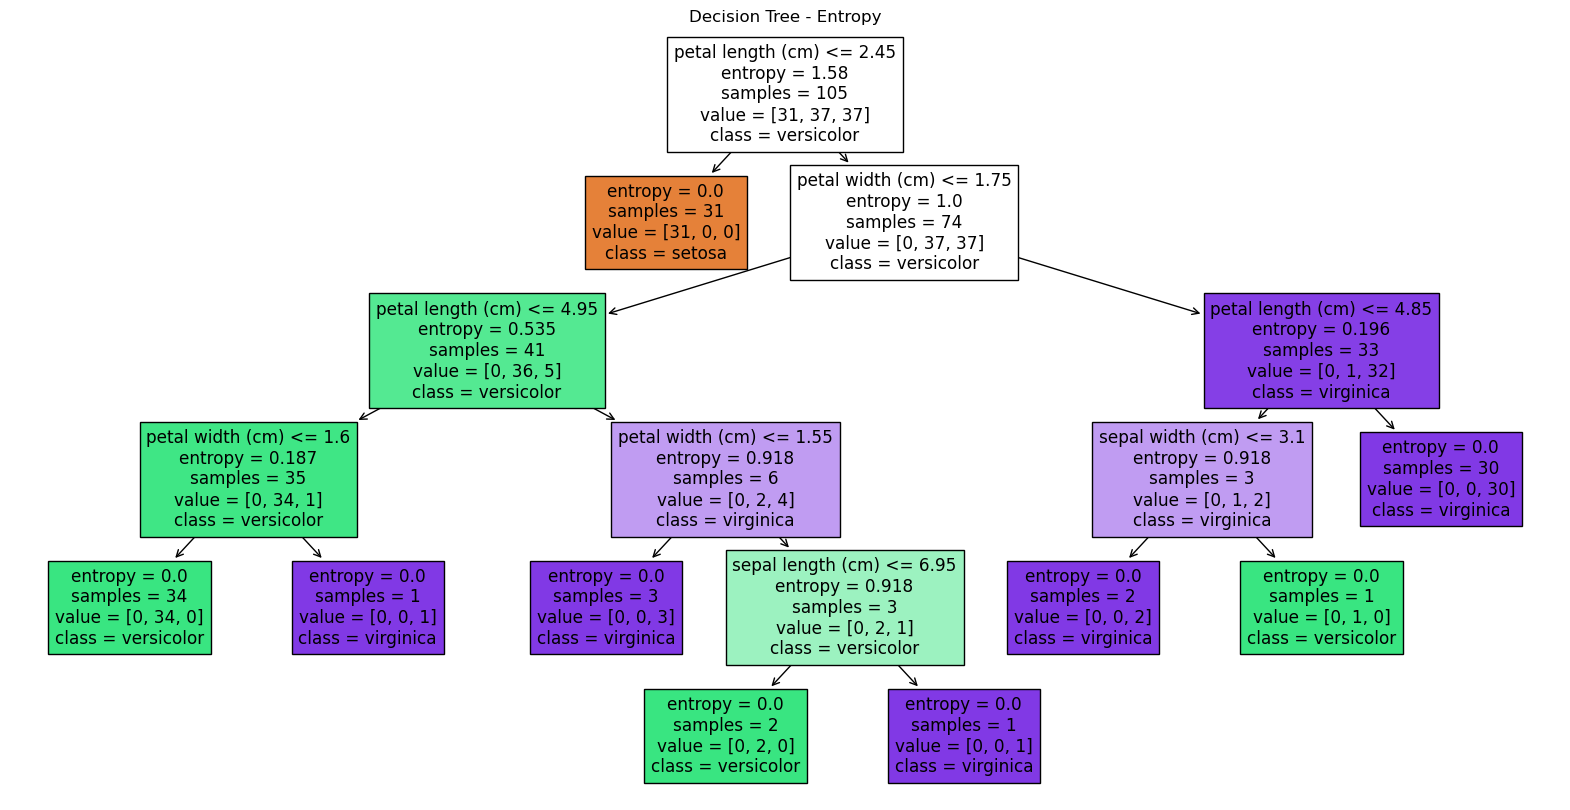

In [163]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree - Entropy")
plt.show()

Accuracy of ID3 Decision Tree: 0.9777777777777777


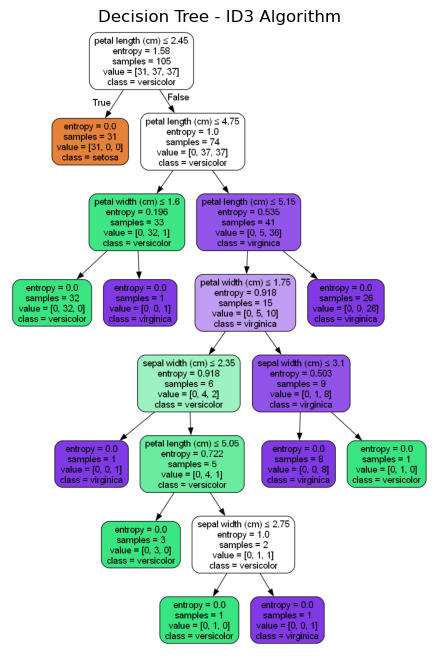

In [164]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ID3 Decision Tree: {accuracy}')

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_id3_decision_tree", format="png")

import matplotlib.pyplot as plt

tree_image = plt.imread("iris_id3_decision_tree.png")

plt.figure(figsize=(10, 8))
plt.imshow(tree_image)
plt.axis('off')
plt.title("Decision Tree - ID3 Algorithm")
plt.show()

In [165]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [166]:
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train C4.5 Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of C4.5 Decision Tree: {accuracy}')

Accuracy of C4.5 Decision Tree: 1.0


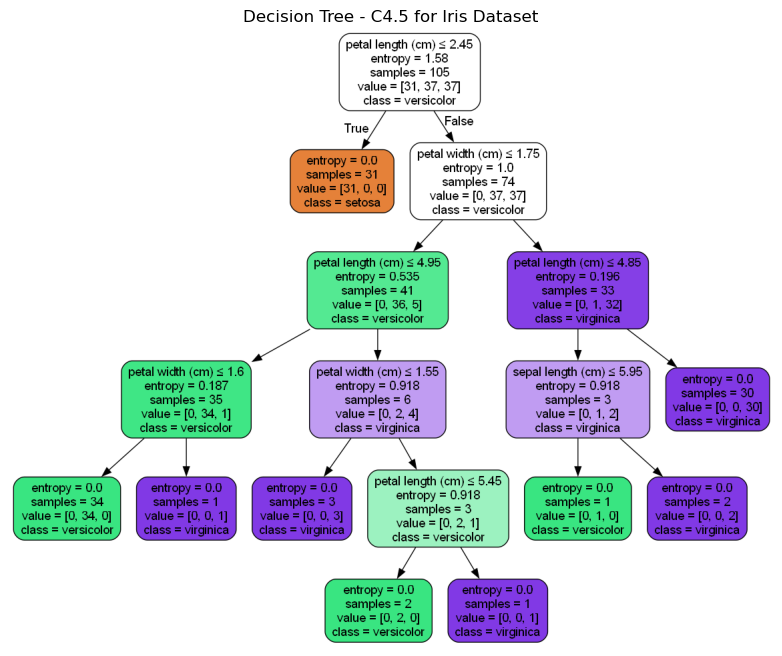

In [167]:
# Plot Decision Tree
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png')  # Save tree as PNG

# Display tree
graph_image = plt.imread("iris_decision_tree.png")

plt.figure(figsize=(10, 8))
plt.imshow(graph_image)
plt.axis('off')
plt.title('Decision Tree - C4.5 for Iris Dataset')
plt.show()

<h3>Dataset Pertama: Pokemon</h3>

In [168]:
!pip install mglearn

In [169]:
!pip install graphviz

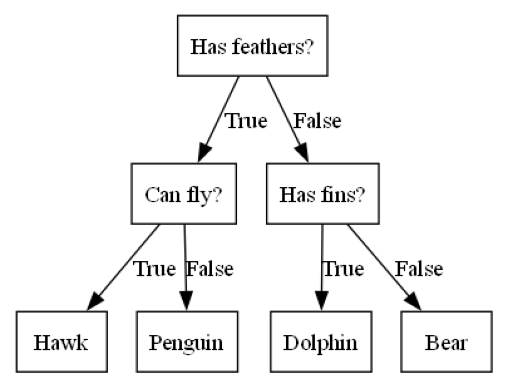

In [170]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt


mglearn.plots.plot_animal_tree()

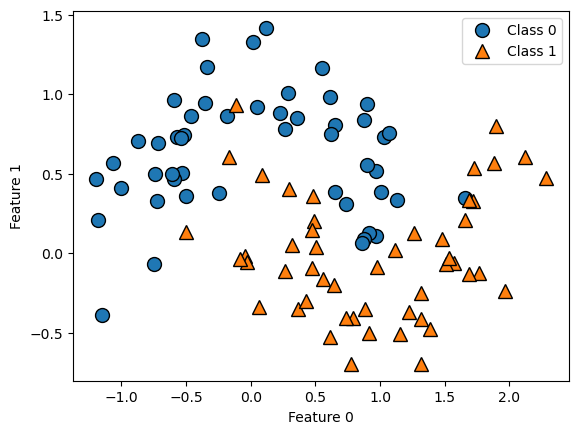

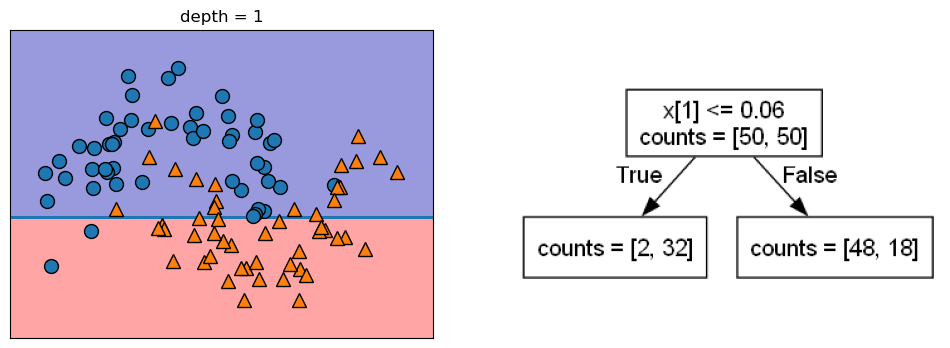

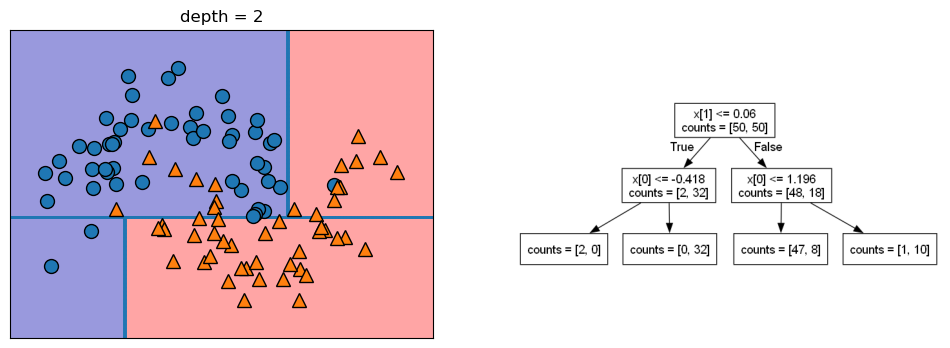

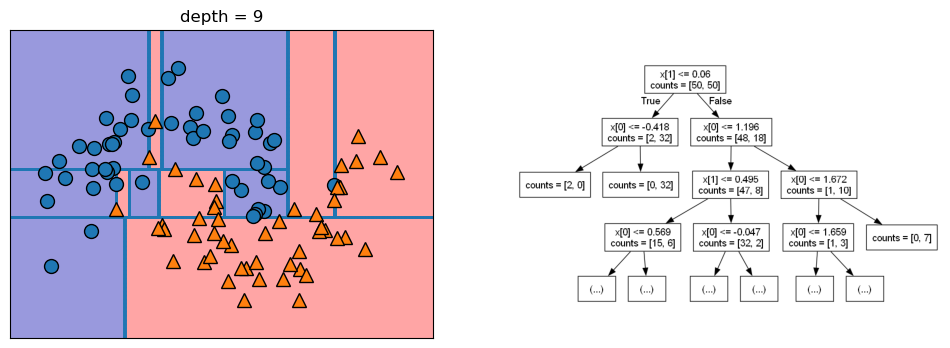

In [171]:
mglearn.plots.plot_tree_progressive()

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("E:/_Kuliah/Semester 5/MachineLearning/Week4/pokemon.csv")
df.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [173]:
X = df[['base_attack', 'base_defense', 'base_stamina']]
y = df['rarity']
x_train, x_test, y_train, y_test = train_test_split(X, y,
        stratify=y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.913


In [174]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.929


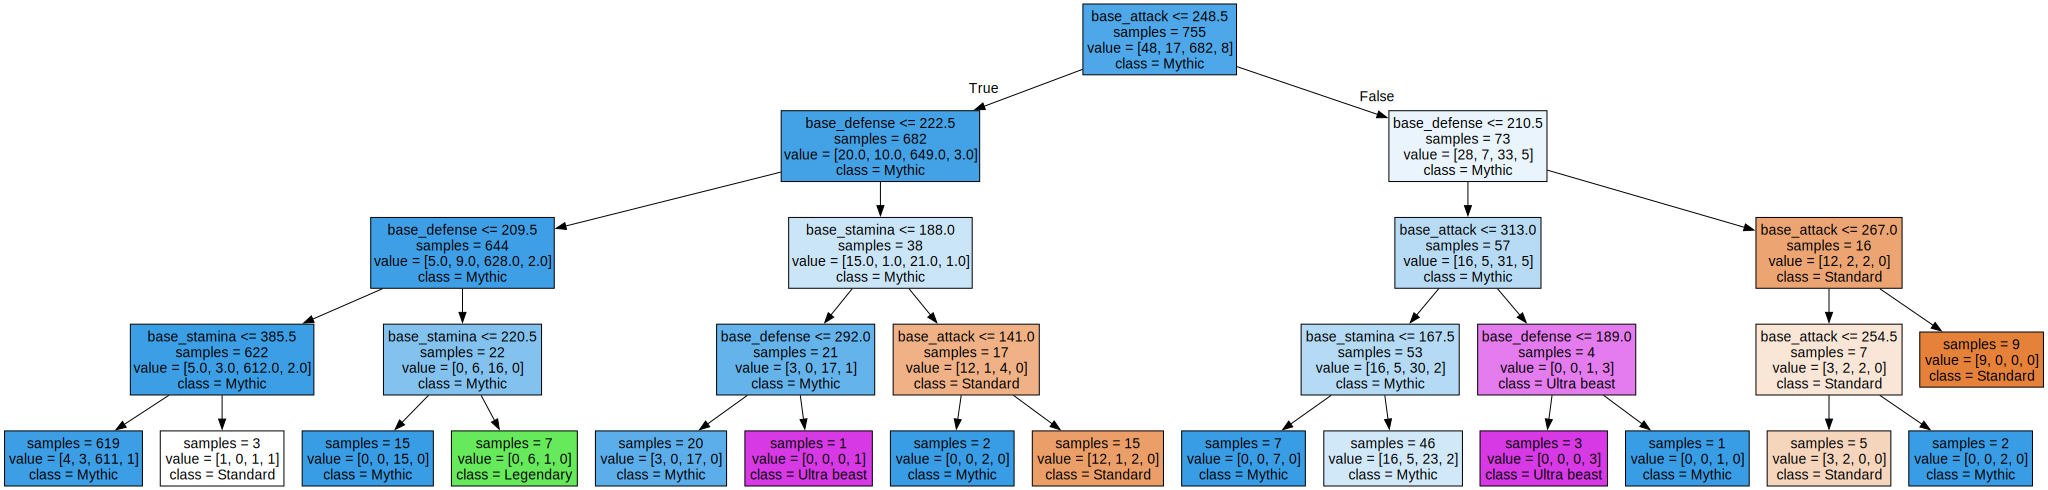

In [175]:
from sklearn.tree import export_graphviz
class_names = df['rarity'].unique().astype(str)
feature_names = ['base_attack', 'base_defense', 'base_stamina']
export_graphviz(tree, out_file="tree.dot", class_names=class_names,
        feature_names=feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [176]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.46184072 0.30605993 0.23209935]


In [177]:
def plot_feature_importances_rarity(model, feature_names):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

    plt.title("Feature Importance for Pokémon Rarity Prediction")
    plt.show()
    plot_feature_importances_rarity(tree, ['base_attack', 'base_defense', 'base_stamina'])

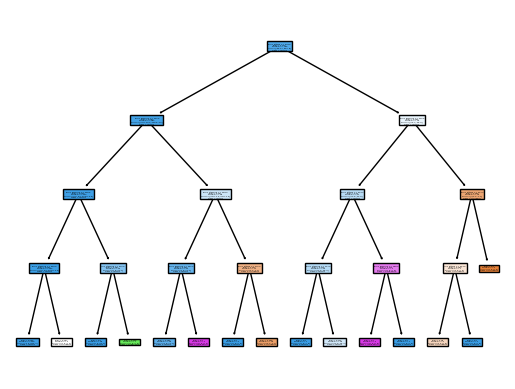

In [178]:
from sklearn.tree import plot_tree
class_names = df['rarity'].unique().astype(str).tolist()
plot_tree(tree, feature_names=['base_attack', 'base_defense', 'base_stamina'],
          class_names=class_names, filled=True)
plt.show()

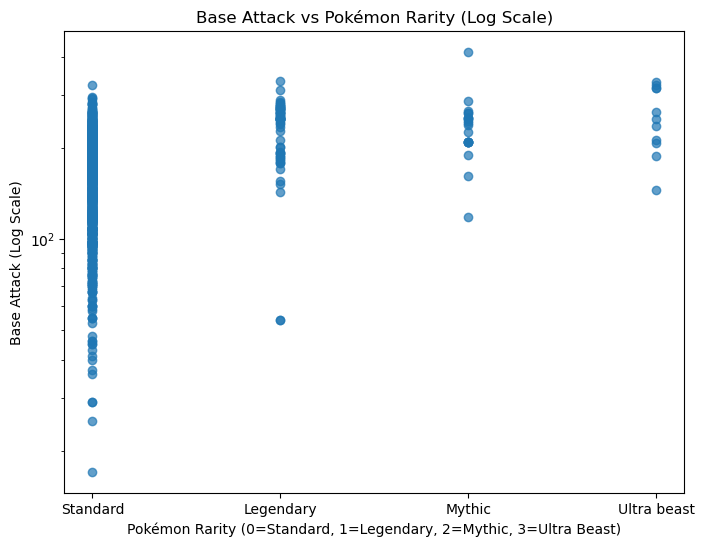

In [179]:
rarity_mapping = {'Standard': 0, 'Legendary': 1, 'Mythic': 2, 'Ultra beast': 3}
df['rarity_mapped'] = df['rarity'].map(rarity_mapping)
plt.figure(figsize=(8, 6))
plt.semilogy(df['rarity_mapped'], df['base_attack'], 'o', alpha=0.7)
plt.xlabel("Pokémon Rarity (0=Standard, 1=Legendary, 2=Mythic, 3=Ultra Beast)")
plt.ylabel("Base Attack (Log Scale)")
plt.title("Base Attack vs Pokémon Rarity (Log Scale)")
plt.xticks([0, 1, 2, 3], ['Standard', 'Legendary', 'Mythic', 'Ultra beast'])
plt.show()


In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
data_train = df['rarity_mapped'].values[:, np.newaxis]
data_test = df['base_attack'].values
data_test = np.where(data_test <= 0, 1, data_test)
x_train = data_train
y_train = np.log(data_test)
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

x_all = df['rarity_mapped'].values[:, np.newaxis]
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)
attack_tree = np.exp(pred_tree)
attack_lr = np.exp(pred_lr)
print("Decision Tree Predictions (Base Attack):", attack_tree[:5])
print("Linear Regression Predictions (Base Attack):", attack_lr[:5])

Decision Tree Predictions (Base Attack): [146.39119883 146.39119883 146.39119883 146.39119883 146.39119883]
Linear Regression Predictions (Base Attack): [147.47265832 147.47265832 147.47265832 147.47265832 147.47265832]


In [181]:
from sklearn.ensemble import RandomForestClassifier
x = df['base_attack'].values[:, np.newaxis]
y = df['rarity_mapped'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)
print(f"Training accuracy: {forest.score(x_train, y_train):.3f}")
print(f"Test accuracy: {forest.score(x_test, y_test):.3f}")


Training accuracy: 0.938
Test accuracy: 0.905


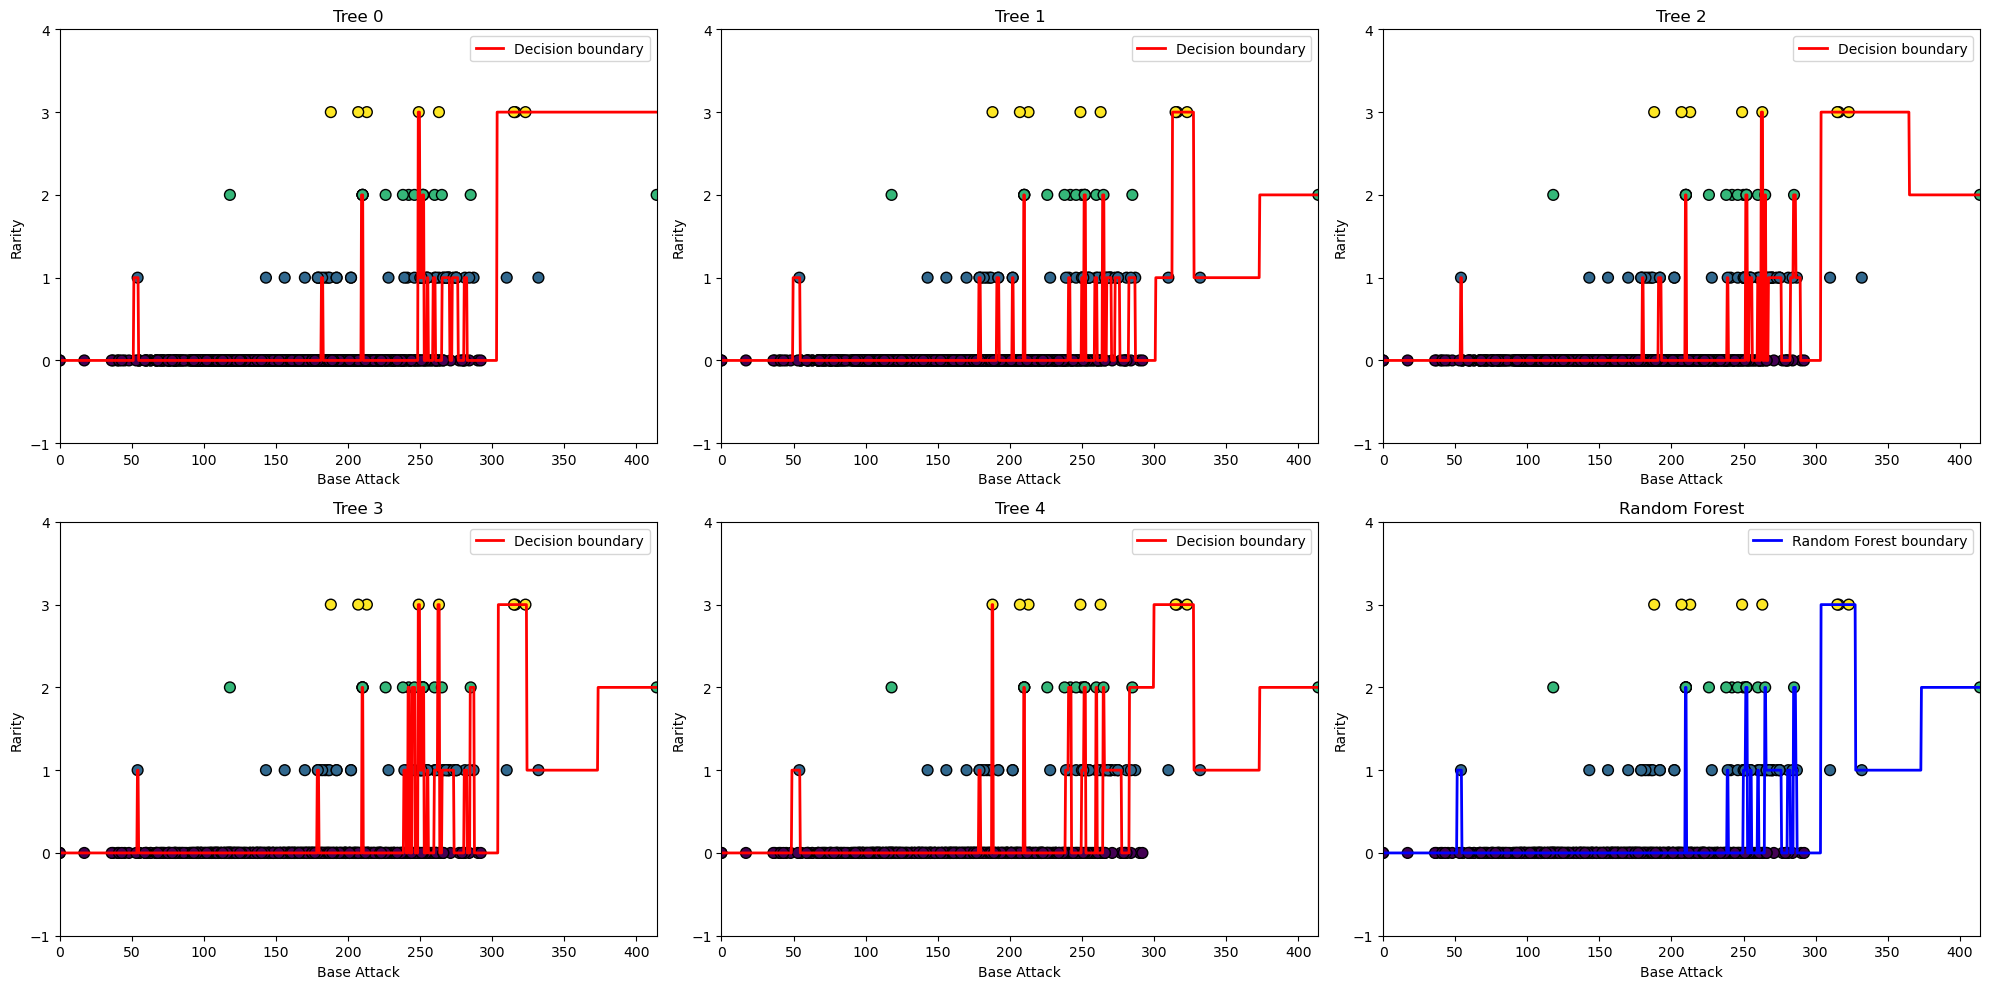

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memplot decision boundary dari decision tree
def plot_tree_partition_1d(X, y, tree, ax=None):
    if ax is None:
        ax = plt.gca()  # Jika ax tidak diberikan, gunakan current axis (gca)
        
    x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    y_pred = tree.predict(x_range)

    ax.plot(x_range, y_pred, color="red", lw=2, label="Decision boundary")
    ax.scatter(X, y, edgecolor="k", c=y, cmap=plt.cm.viridis, s=60)
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(y.min() - 1, y.max() + 1)

    ax.set_xlabel("Base Attack")
    ax.set_ylabel("Rarity")
    ax.legend()

# Membuat plot grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Looping untuk setiap tree dalam forest
for i, (ax, tree) in enumerate(zip(axes.ravel()[:-1], forest.estimators_)):
    ax.set_title(f"Tree {i}")
    plot_tree_partition_1d(x_train, y_train, tree, ax=ax)

# Menampilkan Random Forest boundary di subplot terakhir
axes[-1, -1].set_title("Random Forest")

x_range = np.linspace(x_train.min(), x_train.max(), 1000).reshape(-1, 1)
y_pred_rf = forest.predict(x_range)

# Plot untuk Random Forest di subplot terakhir
axes[-1, -1].plot(x_range, y_pred_rf, color="blue", lw=2, label="Random Forest boundary")
axes[-1, -1].scatter(x_train[:, 0], y_train, edgecolor="k", c=y_train, cmap=plt.cm.viridis, s=60)
axes[-1, -1].set_xlim(x_train.min(), x_train.max())
axes[-1, -1].set_ylim(y_train.min() - 1, y_train.max() + 1)
axes[-1, -1].set_xlabel("Base Attack")
axes[-1, -1].set_ylabel("Rarity")
axes[-1, -1].legend()

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


In [183]:
x = df['base_attack'].values.reshape(-1, 1)
y = df['rarity_mapped'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.897


In [184]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [185]:
import pandas as pd
from collections import Counter
import math
def calculate_entropy(data):
    total_elements = len(data)
    class_counts = Counter(data)
    entropy = 0.0
    for count in class_counts.values():
        probability = count / total_elements
        entropy -= probability * math.log2(probability)
        return entropy
        
target_entropy = calculate_entropy(df['rarity_mapped'])
print(f'Entropy dari target (rarity_mapped): {target_entropy}')

Entropy dari target (rarity_mapped): 0.13204961465527382


In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop(columns=['rarity_mapped'])
y = df_encoded['rarity_mapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy}')


Akurasi model Decision Tree: 1.0


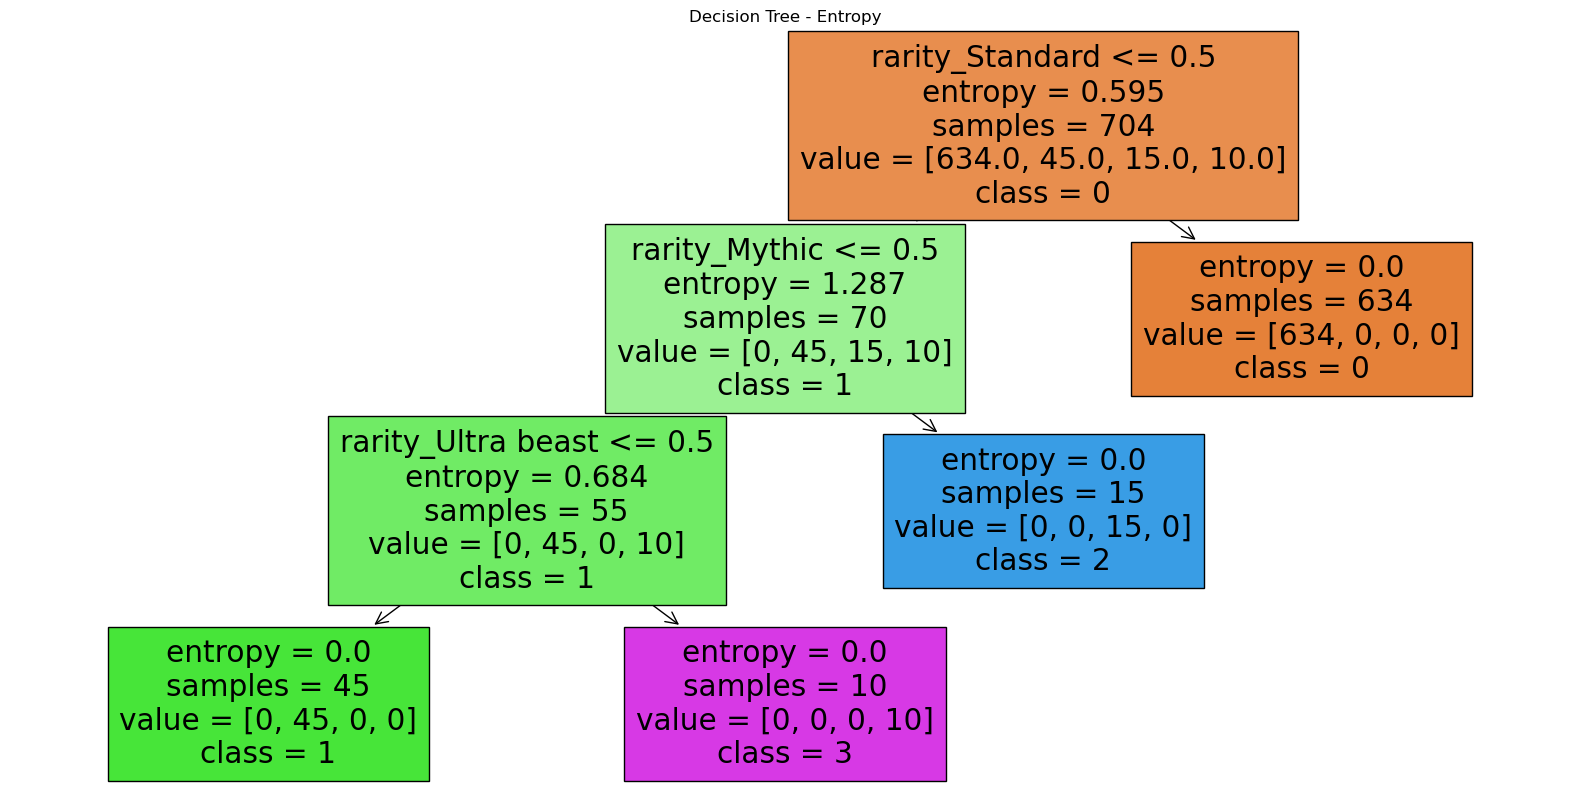

In [187]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = list(X_train.columns)
class_names = list(df['rarity_mapped'].unique().astype(str))
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.title('Decision Tree - Entropy')
plt.show()

Akurasi model ID3 Decision Tree: 1.0


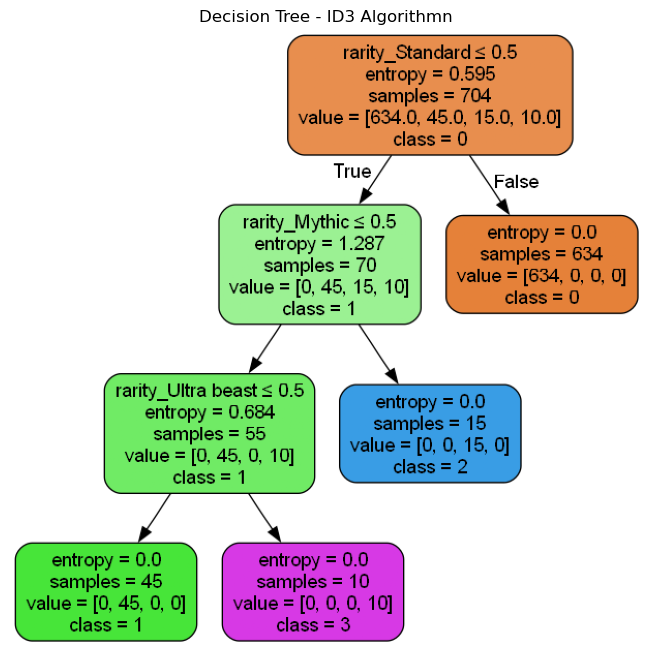

In [188]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X = df_encoded.drop(columns=['rarity_mapped'])
y = df_encoded['rarity_mapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model ID3 Decision Tree: {accuracy}')
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,

class_names=[str(i) for i in
sorted(y.unique())],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_id3_decision_tree", format='png')
tree_image = plt.imread("iris_id3_decision_tree.png")
plt.figure(figsize=(10, 8))
plt.imshow(tree_image)
plt.axis('off')
plt.title('Decision Tree - ID3 Algorithmn')
plt.show()


In [189]:
X = df_encoded.drop(columns=['rarity_mapped'])
y = df_encoded['rarity_mapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model C4.5 Decision Tree: {accuracy}')

Akurasi model C4.5 Decision Tree: 1.0


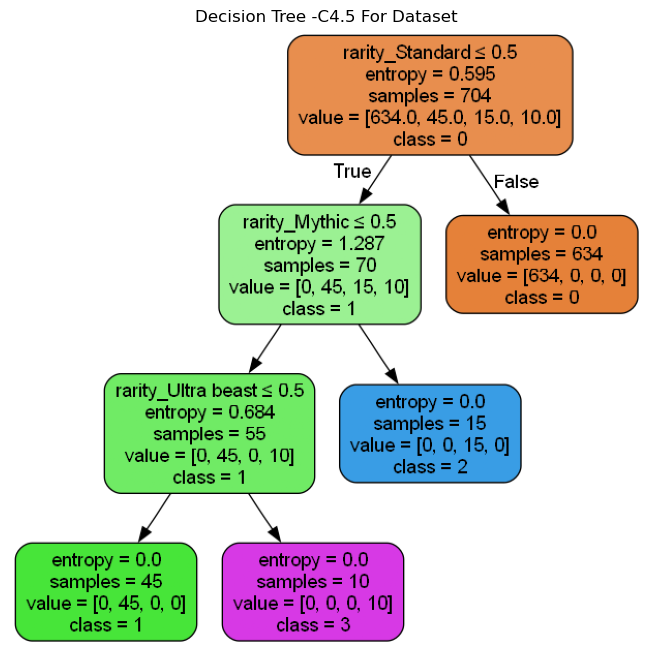

In [190]:
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, 
                           class_names=[str(i) for i in 
                                        sorted(y.unique())], 
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png')
graph_image = plt.imread("iris_decision_tree.png")

plt.figure(figsize=(10, 8))
plt.imshow(graph_image)
plt.axis('off')
plt.title('Decision Tree -C4.5 For Dataset')
plt.show()


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    

In [191]:
output = """ 
Kesimpulan
1. Saya menggunakan Dataset Pokemon, dataset ini menyediakan informasi terperinci tentang 1007 
Pokémon dari game mobile populer Pokémon GO. Dataset ini mencakup berbagai atribut seperti base stats, 
move sets, tingkat kelangkaan, dan metode perolehan. Data dikumpulkan menggunakan RapidAPI Pokémon GO API, 
sehingga menawarkan sumber daya yang kaya bagi peneliti dan penggemar data untuk analisis, proyek machine learning, 
dan pengembangan strategi permainan.Dataset ini menyediakan informasi terperinci tentang 1007 Pokémon dari game mobile 
populer Pokémon GO. Dataset ini mencakup berbagai atribut seperti base stats, move sets, tingkat kelangkaan, dan metode 
perolehan. Data dikumpulkan menggunakan RapidAPI Pokémon GO API, sehingga menawarkan sumber daya yang kaya bagi peneliti 
dan penggemar data untuk analisis, proyek machine learning, dan pengembangan strategi permainan. Dataset ini berisi base_defense, 
base_attack, base_stamina, 
rarity, dll

2. Dataset saya seringkali berubah-rubah akurasinya seperti ketika menggunakan entropy
Entropi lebih sering memberkan akurasi yang lebih baik, daripada random forest yang 
seringkali overfitting.
"""
print(output)

 
Kesimpulan
1. Saya menggunakan Dataset Pokemon, dataset ini menyediakan informasi terperinci tentang 1007 
Pokémon dari game mobile populer Pokémon GO. Dataset ini mencakup berbagai atribut seperti base stats, 
move sets, tingkat kelangkaan, dan metode perolehan. Data dikumpulkan menggunakan RapidAPI Pokémon GO API, 
sehingga menawarkan sumber daya yang kaya bagi peneliti dan penggemar data untuk analisis, proyek machine learning, 
dan pengembangan strategi permainan.Dataset ini menyediakan informasi terperinci tentang 1007 Pokémon dari game mobile 
populer Pokémon GO. Dataset ini mencakup berbagai atribut seperti base stats, move sets, tingkat kelangkaan, dan metode 
perolehan. Data dikumpulkan menggunakan RapidAPI Pokémon GO API, sehingga menawarkan sumber daya yang kaya bagi peneliti 
dan penggemar data untuk analisis, proyek machine learning, dan pengembangan strategi permainan. Dataset ini berisi base_defense, 
base_attack, base_stamina, 
rarity, dll

2. Dataset saya seringkali 

In [192]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Reinhard Javera Maheswara
NIM: 	77732
Time-stamp:	2024-09-26 21:26:32.007920


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [193]:
!jupyter nbconvert --to html "./IF540L_H_laporan_M04_00000077732_Reinhard Javera Maheswara.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_H_laporan_M04_00000077732_Reinhard Javera Maheswara.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 26 image(s).
[NbConvertApp] Writing 3008135 bytes to IF540L_H_laporan_M04_00000077732_Reinhard Javera Maheswara.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#